In [9]:
import string
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import deeplake
import torchvision
import torchvision.transforms as transforms

In [10]:
trainset = deeplake.load("hub://activeloop/tiny-imagenet-train")
# testset = deeplake.load("hub://activeloop/tiny-imagenet-test")
testset = deeplake.load("hub://activeloop/tiny-imagenet-validation")

Opening dataset in read-only mode as you don't have write permissions.


Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [05:34<?, ?B/s]
/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/tiny-imagenet-train



-

hub://activeloop/tiny-imagenet-train loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/tiny-imagenet-validation



|

hub://activeloop/tiny-imagenet-validation loaded successfully.



In [19]:
# trainloader= torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=0)
# testloader= torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=0)
# trainloader = trainset.pytorch(num_workers=0, batch_size=4, shuffle=False)
# tform = transforms.Compose([
#     transforms.ToPILImage(), # Must convert to PIL image for subsequent operations to run
#     transforms.RandomRotation(20), # Image augmentation
#     transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
#     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
# ])

transform = transforms.Compose([
    # transforms.RandomRotation(20), # Image augmentation
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Lambda(lambda x: x.repeat(int(3/x.shape[0]), 1, 1))
]) 
# dataloader= trainset.pytorch(batch_size = 16, num_workers = 2, 
#     transform = {'images': transform, 'labels': None}, shuffle = True)
#dataloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=0)

# dataloader= trainset.pytorch(batch_size = 16, num_workers = 2, 
#     transform = {'images': transform, 'labels': None}, shuffle = True)

# def transform(sample_in):
#     return {'images': transform(sample_in['images']), 'labels': sample_in['labels']}

dataloader= trainset.pytorch(batch_size = 4, num_workers = 2, 
    transform = transform, 
    tensors = ['images', 'labels'],
    shuffle = True)

/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/common.py:137: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(
Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [02:52<?, ?B/s]


In [20]:
dataiter = iter(dataloader)
images, labels = next(dataiter)
images.shape

Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

TransformFailedError: Dataloader transform failed while processing sample at index Caught TransformFailedError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 89, in _process
    return transform(sample)
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/common.py", line 79, in __call__
    return self.composite_transform(data_in)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 137, in __call__
    return F.to_tensor(pic)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/functional.py", line 141, in to_tensor
    raise TypeError(f"pic should be PIL Image or ndarray. Got {type(pic)}")
TypeError: pic should be PIL Image or ndarray. Got <class 'deeplake.util.iterable_ordered_dict.IterableOrderedDict'>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 32, in fetch
    data.append(next(self.dataset_iter))
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 168, in __iter__
    yield _process(data, self.transform, self.return_index)
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 91, in _process
    raise TransformFailedError(index) from e
deeplake.util.exceptions.TransformFailedError: Dataloader transform failed while processing sample at index 54565.
.

In [12]:
for i, data in enumerate(dataloader, 0):
    inputs, labels = data

Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

TransformFailedError: Dataloader transform failed while processing sample at index Caught TransformFailedError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 89, in _process
    return transform(sample)
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/common.py", line 84, in __call__
    data_out[tensor] = value if fn is None else fn(value)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/usr/local/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 1364, in forward
    channels, _, _ = F.get_dimensions(img)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/functional.py", line 79, in get_dimensions
    return F_pil.get_dimensions(img)
  File "/usr/local/lib/python3.10/site-packages/torchvision/transforms/_functional_pil.py", line 31, in get_dimensions
    raise TypeError(f"Unexpected type {type(img)}")
TypeError: Unexpected type <class 'numpy.ndarray'>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 32, in fetch
    data.append(next(self.dataset_iter))
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 168, in __iter__
    yield _process(data, self.transform, self.return_index)
  File "/usr/local/lib/python3.10/site-packages/deeplake/integrations/pytorch/dataset.py", line 91, in _process
    raise TransformFailedError(index) from e
deeplake.util.exceptions.TransformFailedError: Dataloader transform failed while processing sample at index 40272.
.

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
dataiter = iter(trainloader)
images,label = next(dataiter)

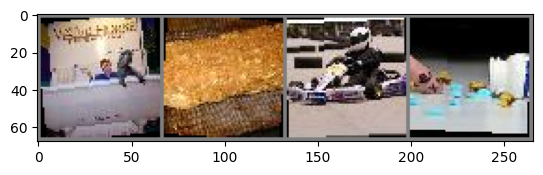

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
for i, data in enumerate(trainloader, 0):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


TransformFailedError: Dataloader transform failed while processing sample at index 26995.

### Errors
For a combination of num_workers = 2 and shuffle = True, the application I cannot load images. When I do the same combination, except the workers equal to 0, it works but cannot be enumerated. This ends after 11 iterations

When I do num_workers = 2 or 0, and shuffle is set to false, terminates at iteration 21.

In [ ]:
from torch.utils.data import DataLoader, Dataset

class ClassificationDataset(Dataset):
    def __init__(self, ds, transform = None):
        self.ds = ds
        self.transform = transform

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        image = self.ds.images[idx].numpy()
        label = self.ds.labels[idx].numpy(fetch_chunks = True).astype(np.int32)

        if self.transform is not None:
            image = self.transform(image)

        sample = {"images": image, "labels": label}

        return sample

In [ ]:
trainloader = ClassificationDataset(trainset,transform)

In [ ]:
for i, data in enumerate(trainloader, 0):
    image, label = data[i]
    print(image.shape)